<a href="https://colab.research.google.com/github/tadeze/MLAlgorithms/blob/master/NLP_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import nltk
import pandas as pd 
from bokeh.io import output_notebook, output_file
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import * 
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import string 
import gensim
from gensim.models.phrases import Phraser, Phrases
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE


In [0]:
# Tokenization 
# The corpus canbe easily added 
from nltk.corpus import gutenberg
# tokenize based on sentence
gber_sent_tokens = sent_tokenize(gutenberg.raw()
                                 )

In [9]:
gber_sent_tokens[1]

"She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."

In [24]:
# further tokenize based on words. 
word_tokenize(gber_sent_tokens[1])[3]

'youngest'

In [0]:
# just sentences. 
gberg_sents = gutenberg.sents()

In [29]:
# Convert all to lowercases. 
 [w.lower() for w in gberg_sents[4]] # characterbase

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

In [0]:
# Remove stopwords 
stwrds = stopwords.words('english') + list(string.punctuation)

In [30]:
# Remove 
[w.lower() for w in gberg_sents[4] if w.lower() not in stwrds]

['youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

In [33]:
### Stemming 
'''
Stemming algorith uses the porter algorithm. An algorithm for suffix stripping. E.g. duaghters to daughter
house to hous or related words house housing treat as same. 
'''


'\nStemming algorith uses the porter algorithm. An algorithm for suffix stripping. E.g. duaghters to daughter\nhouse to hous or related words house housing treat as same. \n'

In [0]:
stemmer = PorterStemmer()
[stemmer.stem(w.lower()) for w in gberg_sents[4] if w.lower() not in stwrds]

In [35]:
## Handling n-grams
"""
To treat bigram like New York as a single token instead of two, we can use Phrases() and Phraser()
from genism library. Bigram takes only last one words as dependencies. P(w_t|w_{t-1}).

The biram model basically analysis how often a pair of words appear together. Then count and score the probablity of a
pair appearing together.

"""

'\nTo treat bigram like New York as a single token instead of two, we can use Phrases() and Phraser()\nfrom genism library. Bigram takes only last one words as dependencies. P(w_t|w_{t-1})\n'

In [0]:
phrases = Phrases(gberg_sents) # takes a sentece to identify how often any given pair words occur together
bigram = Phraser(phrases)

In [42]:
bigram.phrasegrams  # This display how often the count and score each bigram appear together.

{(b'two', b'daughters'): (19, 11.966813731181546),
 (b'her', b'sister'): (195, 17.7960829227865),
 (b"'", b's'): (9781, 31.066242737744524),
 (b'very', b'early'): (24, 11.01214147275924),
 (b'Her', b'mother'): (14, 13.529425062715127),
 (b'long', b'ago'): (38, 63.22343628984788),
 (b'more', b'than'): (541, 29.023584433996874),
 (b'had', b'been'): (1256, 22.306024648925288),
 (b'an', b'excellent'): (54, 39.063874851750626),
 (b'Miss', b'Taylor'): (48, 453.75918026073305),
 (b'very', b'fond'): (28, 24.134280468850747),
 (b'passed', b'away'): (25, 12.35053642325912),
 (b'too', b'much'): (173, 31.376002029426687),
 (b'did', b'not'): (935, 11.728416217142811),
 (b'any', b'means'): (27, 14.096964108090186),
 (b'wedding', b'-'): (15, 17.4695197740113),
 (b'Her', b'father'): (18, 13.129571562488772),
 (b'after', b'dinner'): (21, 21.5285481168817),
 (b'self', b'-'): (124, 47.79018053120332),
 (b'sixteen', b'years'): (12, 107.0461671612265),
 (b'five', b'years'): (42, 40.128755673408115),
 (b'ye

In [0]:
# Todo analysis for trigram and others. 

## Preprocessing the full corpus

For large corpus the stemming and removal of stop words doesn't help much. Can be left as it is


In [0]:
lower_sents = []
for s in gberg_sents:
  lower_sents.append( [w.lower() for w in s 
                       if w.lower() not in list(string.punctuation)])

In [0]:
lower_bigram = Phraser(Phrases(lower_sents,min_count=32, threshold=65))  # we can set constrain on min count and threshold to 
# only count most common pairs. 

In [64]:
lower_bigram.phrasegrams

{(b'afar', b'off'): (52, 108.14220347465505),
 (b'burnt', b'offering'): (184, 297.524653753951),
 (b'burnt', b'offerings'): (86, 299.15702343127646),
 (b'buster', b'bear'): (142, 479.87410772225826),
 (b'captain', b'benwick'): (56, 241.49037086312987),
 (b'captain', b'wentworth'): (196, 529.8756608388247),
 (b'charles', b'hayter'): (33, 92.03437785214481),
 (b'chief', b'priests'): (65, 116.31947753846512),
 (b'colonel', b'brandon'): (132, 1313.0078125),
 (b'couldn', b't'): (89, 171.76138536935215),
 (b'cut', b'off'): (217, 129.60290535032792),
 (b'dare', b'say'): (115, 89.94000515807346),
 (b'de', b'grey'): (77, 603.2109624246722),
 (b'didn', b't'): (180, 220.51081560283686),
 (b'doesn', b't'): (53, 106.2634985949418),
 (b'don', b't'): (830, 250.30957446808512),
 (b'dr', b'bull'): (65, 680.7870294599019),
 (b'dr', b'middleton'): (40, 162.73103819257668),
 (b'drawing', b'room'): (49, 84.91494947493561),
 (b'farmer', b'brown'): (100, 386.05179596892236),
 (b'father', b'brown'): (207, 91.

In [0]:
# Create a cleaned up corpus. 
clean_sents = []
for s in lower_sents:
  clean_sents.append(lower_bigram[s])

In [0]:
x = lower_sents[5]
y = lower_bigram[lower_sents[5]]

['her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembrance',
 'of',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'had',
 'been',
 'supplied',
 'by',
 'an',
 'excellent',
 'woman',
 'as',
 'governess',
 'who',
 'had',
 'fallen',
 'little',
 'short',
 'of',
 'a',
 'mother',
 'in',
 'affection']

## Running word2vec 


In [0]:
model = Word2Vec(sentences=clean_sents, size=64, sg=1, window=10, iter=5,
                 min_count=10, workers=4)

In [76]:
# save model. 
model.save('clean_gutenber.w2v')
# load model. 
#model = gensim.models.Word2Vec.load('clean_gutenber.w2v')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [79]:
model.wv['dog'] # 64 dimension of word vector for the word is created. 

array([ 0.33397558,  0.02795044, -0.10571696,  0.5207174 ,  0.00503756,
       -0.19762382, -0.5502975 ,  0.25008374,  0.32591102,  0.17264596,
        0.52744836, -0.1264395 , -0.183295  , -0.15445071, -0.47587377,
        0.68376124,  0.27204412,  0.47867644, -0.22780098, -0.01346217,
        0.05110286,  0.09869849, -0.3699244 ,  0.07881235, -0.03476465,
        0.17181814,  0.43047318, -0.18781371, -0.02964539, -0.34393322,
       -0.07026237, -0.7194753 ,  0.13949107, -0.0393455 , -0.06751183,
        0.39047608, -0.07387531,  0.2029385 , -0.23918894, -0.06451201,
       -0.16348779,  0.2819555 ,  0.36019248,  0.3340769 ,  0.3534    ,
       -0.43511948,  0.05097928, -0.33749554, -0.15098977,  0.16575663,
       -0.1452561 ,  0.18100822,  0.0449219 , -0.28306508, -0.00225268,
        0.39372563, -0.09976695,  0.08043393,  0.37002602, -0.31986398,
        0.11198719,  0.7011995 ,  0.04756142,  0.4589633 ], dtype=float32)

In [81]:
# check for similarity of the word. 
model.wv.most_similar('father', topn=3)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mother', 0.826674222946167),
 ('brother', 0.7657889127731323),
 ('sister', 0.7490341663360596)]

In [83]:
# Analogies
model.wv.most_similar(positive=['father','women'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('daughters', 0.7221519947052002),
 ('wives', 0.648297131061554),
 ('sister', 0.6459983587265015),
 ('daughter', 0.6401728391647339),
 ('sisters', 0.6378422975540161),
 ('mother', 0.6274315714836121),
 ('concubines', 0.6220024824142456),
 ('loved', 0.6195202469825745),
 ('mothers', 0.6113021373748779),
 ('younger', 0.6056540012359619)]

In [0]:
# Plotting word vectors. 

In [0]:
tsne = TSNE(n_components=2, n_iter=1000)
x_2d = tsne.fit_transform(model.wv[model.wv.vocab])
coords_df = pd.DataFrame(x_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [0]:
coords_df.to_csv('gutenber_tsen.csv')

In [88]:
# Now plot as 2d coordinate in of the tsne projections
coords_df.head(5)

,x,y,token
0,54.646809,-29.374714,emma
1,-9.007567,-46.197361,by
2,53.299088,-31.482281,jane
3,6.957158,-25.594355,volume
4,32.742039,22.793888,i


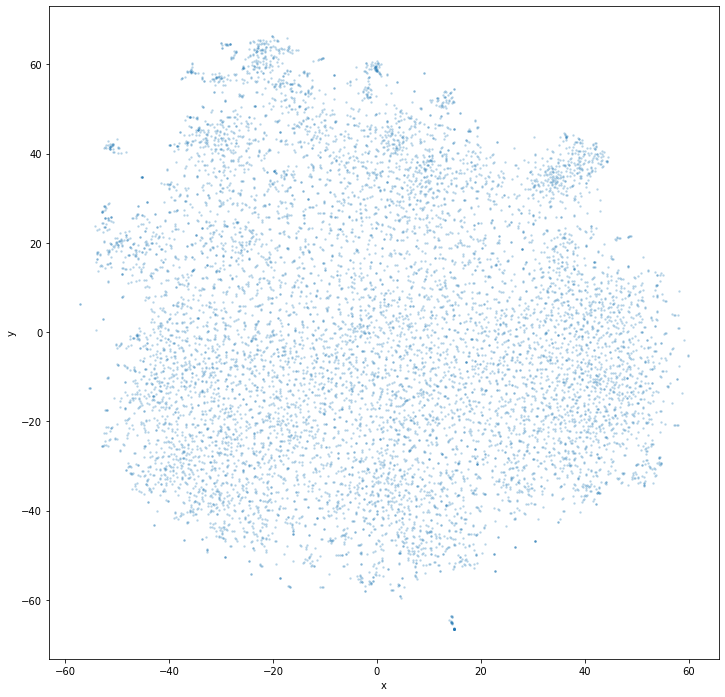

In [89]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)

In [90]:
output_notebook()
subset_df = coords_df.sample(n=5000)
p = figure(plot_width=800, plot_height=800)
_= p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)
show(p)

In [0]:
# NLP Classificatons

Load sentiment classifier.



In [92]:
import keras
from keras.datasets import imdb # new!
from keras.preprocessing.sequence import pad_sequences # new!
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding # new!
from keras.callbacks import ModelCheckpoint # new!
import os # new!
from sklearn.metrics import roc_auc_score, roc_curve # new! import pandas as pd
import matplotlib.pyplot as plt # new!
%matplotlib inline

Using TensorFlow backend.


In [0]:
# Parameters for the classifier
output_dir = 'model_output/dense'

# training 
epoch = 14 
batch_size = 128 

# Vector-space embedding 
n_dim = 64 
n_unique_words = 5000  #5000 most popular words across the review. 
n_words_to_skip = 50  # instead of creating a stopword, skip the top 50 most frequent words. 
max_review_length = 100  # Review length of 100 words 
pad_type = trunc_type = 'pre'  #padding a word. Later we add details about it & trunc remove the word pad.


# NN archictecture 
n_dense = 64 
dropout = 0.5 

In [94]:
 # Load the IMDB film review data 
 (x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, 
                                                         skip_top=n_words_to_skip)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
## Examining the data

In [98]:
for  x in x_train[:6]: print(len(x))

218
189
141
550
147
43


In [0]:
word_index = keras.datasets.imdb.get_word_index()

In [0]:
# These 0, 1,2, are conventional index in NLP for PAD, START & UNK(unknow token)
word_index = {k:(v+3) for k,v in word_index.items()}
word_index['PAD'] = 0
word_index['START'] = 1   
word_index['UNK'] =2 
index_word = {v:k for k,v in word_index.items()}

In [125]:
# Print review as character string 
#index_word[2]
' '.join(index_word[id] for id in x_train[10])

"START french horror cinema has seen something of a UNK over the last couple of years with great films such as inside and UNK romance UNK on to the scene UNK UNK the UNK just slightly but stands head and UNK over most modern horror titles and is surely one of the best french horror films ever made UNK was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is UNK by the excellent writing and acting that UNK the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named UNK sent to prison for UNK he is put in a cell with three others the UNK insane UNK body building UNK UNK and his retarded boyfriend UNK after a short while in the cell together they UNK upon a hiding place in the wall that contains an old UNK after UNK part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black magic is 

In [0]:
(all_x_train,_),(all_x_valid,_) = imdb.load_data()


In [128]:
## Standardizing the length of the reviews
"""
Pad the documents and text in a single line for all reviews to match the lenght of input.
"""

'\nPad the documents and text in a single line for all reviews to match the lenght of input.\n'

In [0]:
x_train = pad_sequences(x_train, maxlen=max_review_length,
                        padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length,
                        padding=pad_type, truncating=trunc_type, value=0)

In [138]:
 [x.shape for x in x_train[0:6]] # check the padding match 
 [' '.join(index_word[id] for id in tt ) for tt in x_train[:6]]

["cry at a film it must have been good and this definitely was also UNK to the two little UNK that played the UNK of norman and paul they were just brilliant children are often left out of the UNK list i think because the stars that play them all grown up are such a big UNK for the whole film but these children are amazing and should be UNK for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was UNK with us all",
 "funny in equal UNK the hair is big lots of UNK UNK men wear those cut UNK UNK that show off their UNK UNK that men actually wore them and the music is just UNK trash that plays over and over again in almost every scene there is trashy music UNK and UNK taking away bodies and the UNK still doesn't close for UNK all UNK aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then",
 "touching the floor at

In [0]:
## Dense Network

In [0]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim,
                    input_length=max_review_length)) # Create w2v from corpus of imdb
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

In [141]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
  os.makedirs(output_dir)


In [145]:
# fit the model. 
model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1,
          validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/14
25000/25000 [==============================] - 5s 188us/step - loss: 0.5038 - accuracy: 0.7332 - val_loss: 0.3409 - val_accuracy: 0.8486
Epoch 2/14
25000/25000 [==============================] - 4s 169us/step - loss: 0.2381 - accuracy: 0.9082 - val_loss: 0.3608 - val_accuracy: 0.8454
Epoch 3/14
25000/25000 [==============================] - 4s 174us/step - loss: 0.0815 - accuracy: 0.9781 - val_loss: 0.4594 - val_accuracy: 0.8310
Epoch 4/14
25000/25000 [==============================] - 4s 170us/step - loss: 0.0186 - accuracy: 0.9975 - val_loss: 0.5406 - val_accuracy: 0.8363
Epoch 5/14
25000/25000 [==============================] - 4s 172us/step - loss: 0.0051 - accuracy: 0.9999 - val_loss: 0.5986 - val_accuracy: 0.8370
Epoch 6/14
25000/25000 [==============================] - 4s 171us/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.6374 - val_accuracy: 0.8364
Epoch 7/14
25000/25000 [==============================] - 4s 1

In [0]:
# Loading the parameters 
model.load_weights(output_dir + "/weights.02.hdf5")

In [0]:
y_hat = model.predict_proba(x_valid)

0

In [152]:
' '.join(index_word[id] for id in all_x_valid[0])


"START please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss"

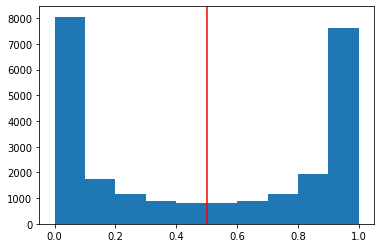

In [161]:

# Plotting histogram of validation da yhat values. 
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='red')  # assignment to _= prevents from object creation. 

In [0]:
# The plot shows the model has strong opinion on the sentinment as either negative or postive 
# the plot is skewed toward both ends of the histogram.

In [166]:
## Calculate AUc 
pct_auc = roc_auc_score(y_valid, y_hat)*100.0 
"{:0.2f}".format(pct_auc)  # just formatting. 

'92.46'

In [0]:
# Checking the wrong decision, false alarms and missed alarms. 
# just append the datafram and check the mismatch parts. 

In [176]:
x_train.shape 

(25000, 100)

Convolutional Networks


In [0]:
from keras.layers import Conv1D, GlobalMaxPool1D, SpatialDropout1D

In [0]:
# output directory name:
output_dir = 'model_output/conv'
 
# training:
epochs = 4
batch_size = 128
 
# vector-space embedding:
n_dim = 64
n_unique_words = 5000 
max_review_length = 400 
pad_type = trunc_type = 'pre' 
drop_embed = 0.2 # new!
 
# convolutional layer architecture: 
n_conv = 256 # filters, a.k.a. kernels 
k_conv = 3 # kernel length
 
# dense layer architecture:
n_dense = 256
dropout = 0.2

In [0]:
model = Sequential()
# vector embedding 
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))

# conv layer
model.add(Conv1D(n_conv, k_conv, activation='relu'))
model.add(GlobalMaxPool1D())
# dense layer 
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))

#output layer 
model.add(Dense(1, activation='sigmoid'))


In [180]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 400, 64)           320000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 400, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 398, 256)          49408     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [182]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1,
          validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/14
25000/25000 [==============================] - 98s 4ms/step - loss: 0.5292 - accuracy: 0.7090 - val_loss: 0.3659 - val_accuracy: 0.8377
Epoch 2/14
25000/25000 [==============================] - 98s 4ms/step - loss: 0.3052 - accuracy: 0.8702 - val_loss: 0.3209 - val_accuracy: 0.8568
Epoch 3/14
25000/25000 [==============================] - 98s 4ms/step - loss: 0.2229 - accuracy: 0.9125 - val_loss: 0.3302 - val_accuracy: 0.8585
Epoch 4/14
25000/25000 [==============================] - 97s 4ms/step - loss: 0.1598 - accuracy: 0.9424 - val_loss: 0.3696 - val_accuracy: 0.8537
Epoch 5/14
25000/25000 [==============================] - 101s 4ms/step - loss: 0.1018 - accuracy: 0.9660 - val_loss: 0.4508 - val_accuracy: 0.8471
Epoch 6/14
25000/25000 [==============================] - 97s 4ms/step - loss: 0.0616 - accuracy: 0.9801 - val_loss: 0.5036 - val_accuracy: 0.8496
Epoch 7/14
25000/25000 [==============================] - 97s 4ms/s

In [183]:
y_hat = model.predict_proba(x_valid)
pct_auc = roc_auc_score(y_valid, y_hat)*100.0 
"{:0.2f}".format(pct_auc)  # just formatting. 

'92.25'

In [203]:
model.load_weights('model_output/dense' + "/weights.03.hdf5")

ValueError: ignored

In [0]:
# TODO:
# Evaluate the models against RNN, LSTM, GRU and biLSTM and stacked Convnet

In [0]:
# Non-sequential archictecture. 
# output directory name:
output_dir = 'model_output/multiconv'
 
# training:
epochs = 4
batch_size = 128
 
# vector-space embedding:
n_dim = 64
n_unique_words = 5000
max_review_length = 400
pad_type = trunc_type = 'pre'
drop_embed = 0.2
 
# convolutional layer architecture:
n_conv_1 = n_conv_2 = n_conv_3 = 256
k_conv_1 = 3
k_conv_2 = 2
k_conv_3 = 4
 
# dense layer architecture:
n_dense = 256
dropout = 0.2

In [0]:
from keras.models import Model 
from keras import Input
from keras.layers import concatenate, GlobalMaxPooling1D

In [0]:
# input layer:
input_layer = Input(shape=(max_review_length,),
                           dtype='int16', name='input')
# embedding:
embedding_layer = Embedding(n_unique_words, n_dim,
                            name='embedding')(input_layer)
drop_embed_layer = SpatialDropout1D(drop_embed,
                                    name='drop_embed')(embedding_layer)

In [0]:
# three parallel convolutional streams:
conv_1 = Conv1D(n_conv_1, k_conv_1,
                activation='relu', name='conv_1')(drop_embed_layer)
maxp_1 = GlobalMaxPooling1D(name='maxp_1')(conv_1)
 
conv_2 = Conv1D(n_conv_2, k_conv_2,
                activation='relu', name='conv_2')(drop_embed_layer)
        
maxp_2 = GlobalMaxPooling1D(name='maxp_2')(conv_2)
 
conv_3 = Conv1D(n_conv_3, k_conv_3,
                activation='relu', name='conv_3')(drop_embed_layer)
 
maxp_3 = GlobalMaxPooling1D(name='maxp_3')(conv_3)

In [0]:
# concatenate the activations from the three streams:
concat = concatenate([maxp_1, maxp_2, maxp_3])
 
# dense hidden layers:
dense_layer = Dense(n_dense,
                    activation='relu', name='dense')(concat)
        
drop_dense_layer = Dropout(dropout, name='drop_dense')(dense_layer)
dense_2 = Dense(int(n_dense/4),
                activation='relu', name='dense_2')(drop_dense_layer)
        
dropout_2 = Dropout(dropout, name='drop_dense_2')(dense_2)
 
# sigmoid output layer:
predictions = Dense(1, activation='sigmoid', name='output')(dropout_2) 
 
# create model:
model = Model(input_layer, predictions)

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [202]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 400)          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 400, 64)      320000      input[0][0]                      
__________________________________________________________________________________________________
drop_embed (SpatialDropout1D)   (None, 400, 64)      0           embedding[0][0]                  
__________________________________________________________________________________________________
conv_1 (Conv1D)                 (None, 398, 256)     49408       drop_embed[0][0]                 
____________________________________________________________________________________________

In [207]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, verbose=1,
          validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/14
25000/25000 [==============================] - 278s 11ms/step - loss: 0.5537 - accuracy: 0.6782 - val_loss: 0.3639 - val_accuracy: 0.8394
Epoch 2/14
25000/25000 [==============================] - 277s 11ms/step - loss: 0.3131 - accuracy: 0.8680 - val_loss: 0.3310 - val_accuracy: 0.8552
Epoch 3/14
25000/25000 [==============================] - 277s 11ms/step - loss: 0.2355 - accuracy: 0.9075 - val_loss: 0.3991 - val_accuracy: 0.8429
Epoch 4/14
25000/25000 [==============================] - 276s 11ms/step - loss: 0.1698 - accuracy: 0.9368 - val_loss: 0.3508 - val_accuracy: 0.8561
Epoch 5/14
25000/25000 [==============================] - 278s 11ms/step - loss: 0.1138 - accuracy: 0.9585 - val_loss: 0.4341 - val_accuracy: 0.8502
Epoch 6/14
25000/25000 [==============================] - 278s 11ms/step - loss: 0.0869 - accuracy: 0.9689 - val_loss: 0.4950 - val_accuracy: 0.8509
Epoch 7/14
25000/25000 [==============================] 

In [0]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [211]:
model.predict(x_valid)

array([[2.0575932e-05],
       [9.9973130e-01],
       [9.9986631e-01],
       ...,
       [3.4660101e-04],
       [5.0992697e-02],
       [4.3948889e-03]], dtype=float32)

In [212]:
y_hat = model.predict(x_valid)
pct_auc = roc_auc_score(y_valid, y_hat)*100.0 
"{:0.2f}".format(pct_auc)  # just formatting. 

'92.90'

In [0]:
 Basicallly re-implement all these models using pytorch under current models. 